# Basic CNN



In this set of exercises, you will be creating a CNN that can classify an image of a hand-written digit into one of 10 classes (the numbers 0 through 9).

## Setup

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd

## Loading the data

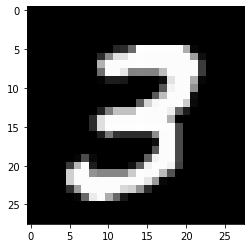

In [3]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# you can plot any of the data samples here
sample = 7
image = x_train[sample]
fig = plt.figure

plt.imshow(image, cmap='gray')
plt.show()


#### The images are 28X28 matrices of grayscale values (numbers between 0 and 255)

In [4]:
print('Shape of the Matrix for a single image is', x_train[sample].shape)
print('\n Data contained in each image object (displayed as a dataframe so that is looks better):\n')

pd.DataFrame(x_train[sample])

Shape of the Matrix for a single image is (28, 28)

 Data contained in each image object (displayed as a dataframe so that is looks better):



,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,253,253,174,6,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,43,...,252,252,252,158,14,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,178,...,252,252,252,252,59,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,109,...,252,252,252,252,59,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,4,...,226,252,252,172,7,0,0,0,0,0


## Input Data Pre-processsing

We will be using the digits dataset from sklearn: https://scikit-learn.org/stable/datasets/toy_dataset.html#digits-dataset

In [5]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Build the CNN


### Exercise 1:
* After the input layer, add a Conv2D layer with the following configuration: 32 filters, kernel size of 3 by 3 (specify as parameter kernel_size=(3, 3) in the function call to Conv2D), strides of 1 for each dimension (horizontal and vertical), "relu" activation
* After the Conv2D layer, add a MaxPooling2D layer, where the pool size is 2 by 2 (use same type of format as for kernel size above)
* After the Flatten layer, add a  Dropout layer configured with a dropout fraction between 0 and 1, e.g., 0.5
* After the Dropout layer, add a Dense layer, where the number of units is "num_classes" the activation is "softmax".

**Hint: Find the format of the layer functions in the keras documentation, e.g.** https://keras.io/api/layers/convolution_layers/convolution2d/.

In [6]:
from keras.layers import convolutional
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Activation, Flatten, Dropout

model = keras.Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1),  activation="relu", input_shape = x_train.shape[1:]))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))  

model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dropout (Dropout)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
____________________________________________________

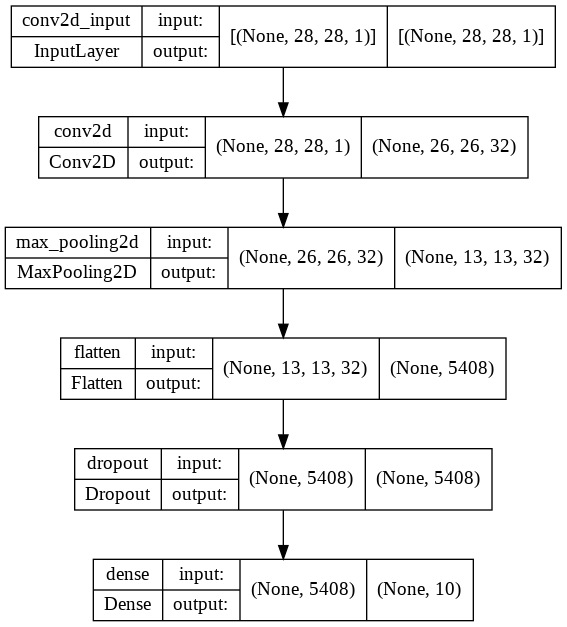

In [7]:
keras.utils.plot_model(model, 'this_model.png', show_shapes=True)

## Training the model

### Exercise 2

Experiment with different # of epochs in the code below to try to get better performance

In [8]:
batch_size = 128
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/5
422/422 [==============================] - 23s 53ms/step - loss: 0.4278 - accuracy: 0.8787 - val_loss: 0.1638 - val_accuracy: 0.9555
Epoch 2/5
422/422 [==============================] - 22s 53ms/step - loss: 0.1834 - accuracy: 0.9464 - val_loss: 0.1041 - val_accuracy: 0.9743
Epoch 3/5
422/422 [==============================] - 22s 53ms/step - loss: 0.1350 - accuracy: 0.9608 - val_loss: 0.0825 - val_accuracy: 0.9782
Epoch 4/5
422/422 [==============================] - 22s 53ms/step - loss: 0.1125 - accuracy: 0.9661 - val_loss: 0.0712 - val_accuracy: 0.9805
Epoch 5/5
422/422 [==============================] - 22s 53ms/step - loss: 0.1022 - accuracy: 0.9695 - val_loss: 0.0671 - val_accuracy: 0.9805


Note: validation_split above is the fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. 

## Testing the trained model

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy:", score[1])

Test accuracy: 0.9778000116348267
